<a href="https://colab.research.google.com/github/edwingarcia18/BIENES-RAICES-COLAB/blob/main/Copia_de_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from textblob import TextBlob

frases=[
    "I love this product, it works perfectly!",
    "The service was terrible. I will not come back.",
    "The food was okay, nothing special."
]

for frase in frases:
  blob=TextBlob(frase)
  print(f"Frase: '{frase}'| Sentimiento: {blob.sentiment.polarity}")

  if blob.sentiment.polarity>0.3:
    print("El sentimiento es positivo")
  elif blob.sentiment.polarity<-0.3:
    print("El sentimiento es negativo")
  else:
    print("El sentimiento es neutral")

Frase: 'I love this product, it works perfectly!'| Sentimiento: 0.75
El sentimiento es positivo
Frase: 'The service was terrible. I will not come back.'| Sentimiento: -0.5
El sentimiento es negativo
Frase: 'The food was okay, nothing special.'| Sentimiento: 0.4285714285714286
El sentimiento es positivo


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

frases=["I love this!","This is terrible","Not good,  not bad","Amazing Performance","Worst experience ever"]
sentimientos=[1,0,0,1,0]
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(frases)

X_train,X_test,Y_train,Y_test=train_test_split(X,sentimientos,test_size=0.2,random_state=42)
model=MultinomialNB()
model.fit(X_train,Y_train)
print(f"Precision del modelo: {model.score(X_test,Y_test)}")



Precision del modelo: 0.0


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Muestras cargadas  2000
Clases : {'pos', 'neg'}
Resultados para Naive Bayes
              precision    recall  f1-score   support

         neg       0.82      0.80      0.81       250
         pos       0.80      0.82      0.81       250

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500

Precision NB: 0.81
Resultados para SVM
              precision    recall  f1-score   support

         neg       0.84      0.81      0.82       250
         pos       0.82      0.84      0.83       250

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500

Precision SVM: 0.826


Text(0.5, 1.0, 'Matriz de la confusión SVM - (Movies Reviews)')

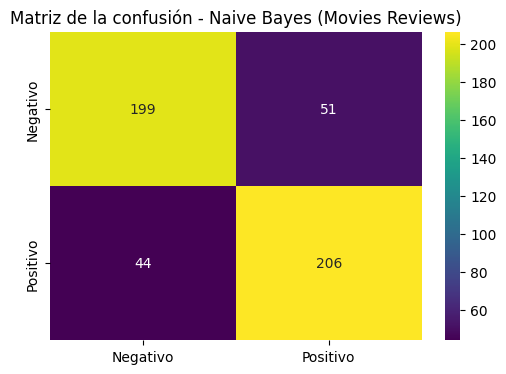

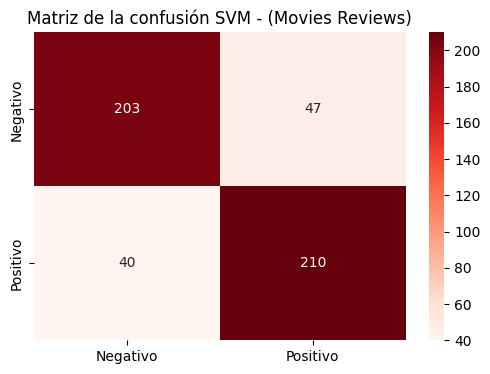

In [ ]:
# IMPORTACION DE LAS LIBRERIAS
import nltk
# NLTK libreria que permite que importemos un dataset real que contiene reseñas de peliculas (2.000 reseñas): positivas o negativas
from nltk.corpus import movie_reviews
# Permite dividir el conjunto de datos en entrenamiento y prueba.
from sklearn.model_selection import train_test_split
#Analizar o convertir texto a vectores númericos
from sklearn.feature_extraction.text import TfidfVectorizer
# Utilizar el algoritmo de Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# Utilizar las Maquinas de Soporte vectorial.
from sklearn.svm import LinearSVC
# Se importan las metricas para poder analizar la clasificación.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Libreria para poder gráficar la matriz de la confusión.
import matplotlib.pyplot as plt
# Libreria para poder generar mapas de calor
import seaborn as sns
#descargar el dataset desde la libreria
nltk.download('movie_reviews')
# se crean dos listas una docs, textos crudos, y labels etiquetas (pos/neg)
docs=[]
labels=[]
# Ciclo que permite iterar sobre la clases 'neg', y luego 'pos'
for category in movie_reviews.categories():
# Mostrar para cada clase cual es el id de comentario
  for fileid in movie_reviews.fileids(category):
# Agregar el texto en la lista docs[]
    docs.append(movie_reviews.raw(fileid))
#Agregar la categoria en la lista labels[]
    labels.append(category)

print("Muestras cargadas ", len(docs))
print("Clases :", set(labels))

# LIMPIEZA DE LOS DATOS
vectorizer=TfidfVectorizer(
# 1. Homogeneizar el texto a mayusculas o minusculas
    lowercase=True,
#2. Eliminar las stopwords: Articulos, conectores y debo decirles el idioma
    stop_words='english',
#3. Descartar terminos que sean poco informativos por su alta frecuencia
    max_df=0.9,
#4. Descartar terminos que sean raros
    min_df=5,
#5. Secuencia de n palabras consecutivas que son tomadas del texto o frases
    ngram_range=(1,2)
)

X=vectorizer.fit_transform(docs)
y=labels

# DIVISION ENTRE ENTRENAMIENTO Y PRUEBA
X_train,X_test,Y_train,Y_test=train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

#Aplicacion del algoritmo de naive bayes
nb=MultinomialNB()
#Entrenamiento del algoritmo
nb.fit(X_train,Y_train)
#Hallamos la predicción
y_pred_nb=nb.predict(X_test)

print("Resultados para Naive Bayes")
print(classification_report(Y_test,y_pred_nb))
print("Precision NB:", round(accuracy_score(Y_test,y_pred_nb),3))
#Matriz de la confusión para Naive Bayes
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_test,y_pred_nb), annot=True, cmap='viridis',fmt='d',
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'])
plt.title("Matriz de la confusión - Naive Bayes (Movies Reviews)")


#Maquinas de soporte vectorial
#Aplicacion del algoritmo de Maquina de soporte vectorial
svm=LinearSVC()
#Entrenamiento del algoritmo
svm.fit(X_train,Y_train)
#Hallamos la predicción
y_pred_svm=svm.predict(X_test)

print("Resultados para SVM")
print(classification_report(Y_test,y_pred_svm))
print("Precision SVM:", round(accuracy_score(Y_test,y_pred_svm),3))

# Matriz de la confusión para SVM
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_test,y_pred_svm), annot=True, cmap='Reds', fmt='d',
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'])
plt.title("Matriz de la confusión SVM - (Movies Reviews)")







[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Resultados con Naive Bayes
              precision    recall  f1-score   support

         neg       0.74      0.81      0.78      1250
         pos       0.79      0.72      0.75      1250

    accuracy                           0.76      2500
   macro avg       0.77      0.76      0.76      2500
weighted avg       0.77      0.76      0.76      2500



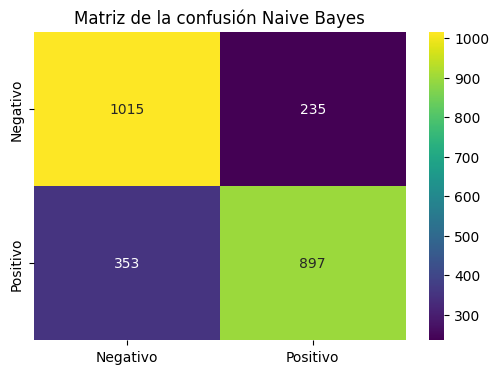

Resultados con Maquinas de soporte Vectorial
              precision    recall  f1-score   support

         neg       0.75      0.75      0.75      1250
         pos       0.75      0.75      0.75      1250

    accuracy                           0.75      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.75      0.75      0.75      2500



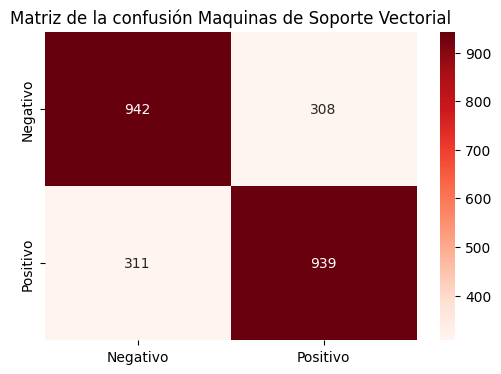

Resultados con Regresión Logistica
              precision    recall  f1-score   support

         neg       0.75      0.80      0.77      1250
         pos       0.78      0.74      0.76      1250

    accuracy                           0.77      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.77      0.77      0.77      2500



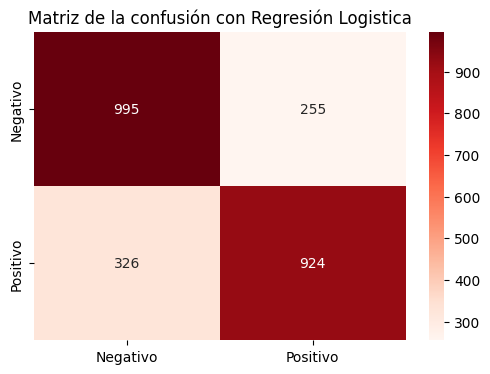

In [ ]:
import nltk
# Con la libreria nltk puede traer el dataset twitter_sample
from nltk.corpus import twitter_samples, stopwords
#libreria que permite dividir el conjunto de entrenamiento y prueba.
from sklearn.model_selection import train_test_split
# Libreria de procesamiento de texto
from sklearn.feature_extraction.text import TfidfVectorizer
# Libreria necesaria para usar el algoritmo de Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# Libreria necesaria para usar el algoritmo de regresion logistica
from sklearn.linear_model import LogisticRegression
# Libreria necesaria par usar el algoritmo de maquinas de soporte vectorial
from sklearn.svm import LinearSVC
# Agregamos la libreria para poder trabajar con las métricas de clasificación.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# libreria para graficar
import matplotlib.pyplot as plt
import seaborn as sns
# Libreria que permite trabajar con expresiones regulares
import re
# Libreria de procesamiento natural
from nltk.stem import WordNetLemmatizer
# Descargar los paquetes necesarios para poder trabajar con el conjunto de entrenamiento
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar Dataset

pos_tweets=twitter_samples.strings('positive_tweets.json')
neg_tweets=twitter_samples.strings('negative_tweets.json')

docs=pos_tweets+neg_tweets
labels=['pos']*len(pos_tweets) +['neg']*len(neg_tweets)

#limpieza profunda
# quitamos las palabras como articulos y demas al texto
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

def limpiar_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+", "", tweet)    # eliminar URLs
    tweet = re.sub(r"@\w+", "", tweet)              # eliminar menciones
    tweet = re.sub(r"#", "", tweet)                 # eliminar #
    tweet = re.sub(r"[^A-Za-z\s]", "", tweet)       # eliminar signos, emojis, números
    tweet = re.sub(r"(.)\1{2,}", r"\1\1", tweet)    # normalizar repeticiones
    tweet = tweet.lower().strip()
    palabras = [lemmatizer.lemmatize(w) for w in tweet.split() if w not in stop_words]
    return " ".join(palabras)
#Llamamos la función para limpiar cada tweet
docs_limpios=[limpiar_tweet(t) for t in docs]

# LIMPIEZA DE LOS DATOS
vectorizer=TfidfVectorizer(
# 1. Homogeneizar el texto a mayusculas o minusculas
    lowercase=True,
#2. Descartar terminos que sean poco informativos por su alta frecuencia
    max_df=0.9,
#3. Descartar terminos que sean raros
    min_df=2,
#3. Secuencia de n palabras consecutivas que son tomadas del texto o frases
    ngram_range=(1,3)
)

X=vectorizer.fit_transform(docs_limpios)
y=labels

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,
                                               random_state=42, stratify=y)
# Algoritmo de Naive Bayes
nb=MultinomialNB()
nb.fit(X_train,Y_train)
y_pred_nb=nb.predict(X_test)

print("Resultados con Naive Bayes")
print(classification_report(Y_test,y_pred_nb))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_test,y_pred_nb), annot=True,
            cmap='viridis', fmt='d',
            xticklabels=['Negativo','Positivo'],
            yticklabels=['Negativo','Positivo'])
plt.title("Matriz de la confusión Naive Bayes")
plt.show()

# Maquinas de soporte vectorial
svm=LinearSVC()
svm.fit(X_train,Y_train)
y_pred_svm=svm.predict(X_test)

print("Resultados con Maquinas de soporte Vectorial")
print(classification_report(Y_test,y_pred_svm))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_test,y_pred_svm), annot=True,
            cmap='Reds', fmt='d',
            xticklabels=['Negativo','Positivo'],
            yticklabels=['Negativo','Positivo'])
plt.title("Matriz de la confusión Maquinas de Soporte Vectorial")
plt.show()

# Algoritmo de regresión Logistica
logreg=LogisticRegression(max_iter=3000)
logreg.fit(X_train,Y_train)
y_pred_lr=logreg.predict(X_test)

print("Resultados con Regresión Logistica")
print(classification_report(Y_test,y_pred_lr))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y_test,y_pred_lr), annot=True,
            cmap='Reds', fmt='d',
            xticklabels=['Negativo','Positivo'],
            yticklabels=['Negativo','Positivo'])
plt.title("Matriz de la confusión con Regresión Logistica")
plt.show()






In [ ]:
import pandas as pd
df=pd.read_excel("ventas_productos.xlsx")
print(df)


     Producto  Cantidad  Precio_Unitario
0  Producto A        10               20
1  Producto B        15               35
2  Producto C         8               50
3  Producto D        20               10
4  Producto E         5               60


In [ ]:
# Iterador o ciclos repetitivos
for i in range (1,10,1):
  print(i)

1
2
3
4
5
6
7
8
9
